# Semantic segmentation

https://huggingface.co/docs/datasets/semantic_segmentation

In [ ]:
from datasets import load_dataset

dataset = load_dataset("scene_parse_150", split="train")

In [ ]:
dataset

Dataset({
    features: ['image', 'annotation', 'scene_category'],
    num_rows: 20210
})

In [ ]:
index = 10
dataset[index]

{'image': <PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=400x272>,
 'annotation': <PIL.PngImagePlugin.PngImageFile image mode=L size=400x272>,
 'scene_category': 168}

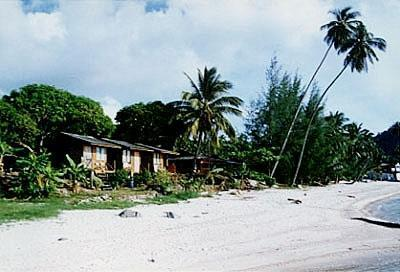

In [ ]:
dataset[index]["image"]

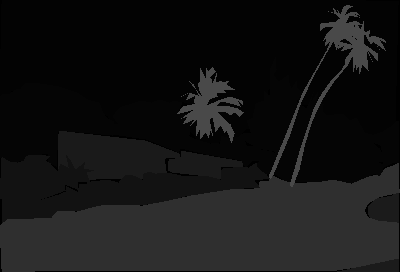

In [ ]:
dataset[index]["annotation"]

In [ ]:
import numpy as np

# https://github.com/tensorflow/models/blob/master/research/deeplab/utils/get_dataset_colormap.py

def create_ade20k_label_colormap():
  """Creates a label colormap used in ADE20K segmentation benchmark.

  Returns:
    A colormap for visualizing segmentation results.
  """
  return np.asarray([
      [0, 0, 0],
      [120, 120, 120],
      [180, 120, 120],
      [6, 230, 230],
      [80, 50, 50],
      [4, 200, 3],
      [120, 120, 80],
      [140, 140, 140],
      [204, 5, 255],
      [230, 230, 230],
      [4, 250, 7],
      [224, 5, 255],
      [235, 255, 7],
      [150, 5, 61],
      [120, 120, 70],
      [8, 255, 51],
      [255, 6, 82],
      [143, 255, 140],
      [204, 255, 4],
      [255, 51, 7],
      [204, 70, 3],
      [0, 102, 200],
      [61, 230, 250],
      [255, 6, 51],
      [11, 102, 255],
      [255, 7, 71],
      [255, 9, 224],
      [9, 7, 230],
      [220, 220, 220],
      [255, 9, 92],
      [112, 9, 255],
      [8, 255, 214],
      [7, 255, 224],
      [255, 184, 6],
      [10, 255, 71],
      [255, 41, 10],
      [7, 255, 255],
      [224, 255, 8],
      [102, 8, 255],
      [255, 61, 6],
      [255, 194, 7],
      [255, 122, 8],
      [0, 255, 20],
      [255, 8, 41],
      [255, 5, 153],
      [6, 51, 255],
      [235, 12, 255],
      [160, 150, 20],
      [0, 163, 255],
      [140, 140, 140],
      [250, 10, 15],
      [20, 255, 0],
      [31, 255, 0],
      [255, 31, 0],
      [255, 224, 0],
      [153, 255, 0],
      [0, 0, 255],
      [255, 71, 0],
      [0, 235, 255],
      [0, 173, 255],
      [31, 0, 255],
      [11, 200, 200],
      [255, 82, 0],
      [0, 255, 245],
      [0, 61, 255],
      [0, 255, 112],
      [0, 255, 133],
      [255, 0, 0],
      [255, 163, 0],
      [255, 102, 0],
      [194, 255, 0],
      [0, 143, 255],
      [51, 255, 0],
      [0, 82, 255],
      [0, 255, 41],
      [0, 255, 173],
      [10, 0, 255],
      [173, 255, 0],
      [0, 255, 153],
      [255, 92, 0],
      [255, 0, 255],
      [255, 0, 245],
      [255, 0, 102],
      [255, 173, 0],
      [255, 0, 20],
      [255, 184, 184],
      [0, 31, 255],
      [0, 255, 61],
      [0, 71, 255],
      [255, 0, 204],
      [0, 255, 194],
      [0, 255, 82],
      [0, 10, 255],
      [0, 112, 255],
      [51, 0, 255],
      [0, 194, 255],
      [0, 122, 255],
      [0, 255, 163],
      [255, 153, 0],
      [0, 255, 10],
      [255, 112, 0],
      [143, 255, 0],
      [82, 0, 255],
      [163, 255, 0],
      [255, 235, 0],
      [8, 184, 170],
      [133, 0, 255],
      [0, 255, 92],
      [184, 0, 255],
      [255, 0, 31],
      [0, 184, 255],
      [0, 214, 255],
      [255, 0, 112],
      [92, 255, 0],
      [0, 224, 255],
      [112, 224, 255],
      [70, 184, 160],
      [163, 0, 255],
      [153, 0, 255],
      [71, 255, 0],
      [255, 0, 163],
      [255, 204, 0],
      [255, 0, 143],
      [0, 255, 235],
      [133, 255, 0],
      [255, 0, 235],
      [245, 0, 255],
      [255, 0, 122],
      [255, 245, 0],
      [10, 190, 212],
      [214, 255, 0],
      [0, 204, 255],
      [20, 0, 255],
      [255, 255, 0],
      [0, 153, 255],
      [0, 41, 255],
      [0, 255, 204],
      [41, 0, 255],
      [41, 255, 0],
      [173, 0, 255],
      [0, 245, 255],
      [71, 0, 255],
      [122, 0, 255],
      [0, 255, 184],
      [0, 92, 255],
      [184, 255, 0],
      [0, 133, 255],
      [255, 214, 0],
      [25, 194, 194],
      [102, 255, 0],
      [92, 0, 255],
  ])

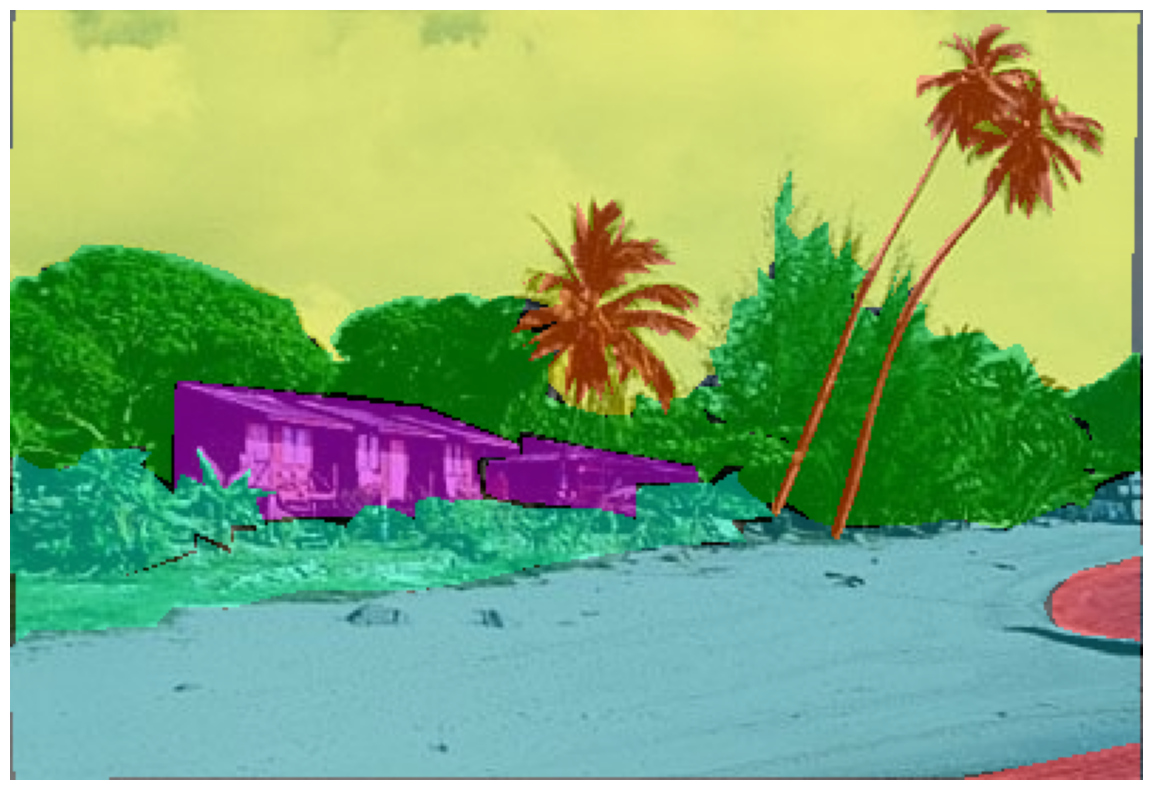

In [ ]:
import matplotlib.pyplot as plt

def visualize_seg_mask(image: np.ndarray, mask: np.ndarray):
   color_seg = np.zeros((mask.shape[0], mask.shape[1], 3), dtype=np.uint8)
   palette = np.array(create_ade20k_label_colormap())
   for label, color in enumerate(palette):
       color_seg[mask == label, :] = color
   color_seg = color_seg[..., ::-1]  # convert to BGR

   img = np.array(image) * 0.5 + color_seg * 0.5  # plot the image with the segmentation map
   img = img.astype(np.uint8)

   plt.figure(figsize=(15, 10))
   plt.imshow(img)
   plt.axis("off")
   plt.show()


visualize_seg_mask(
    np.array(dataset[index]["image"]),
    np.array(dataset[index]["annotation"])
)

In [ ]:
import albumentations

transform = albumentations.Compose(
    [
        albumentations.Resize(256, 256),
        albumentations.RandomBrightnessContrast(brightness_limit=0.3, contrast_limit=0.3, p=0.5),
    ]
)

In [ ]:
def transforms(examples):
    transformed_images, transformed_masks = [], []
    for image, seg_mask in zip(examples["image"], examples["annotation"]):
        image, seg_mask = np.array(image), np.array(seg_mask)
        transformed = transform(image=image, mask=seg_mask)
        transformed_images.append(transformed["image"])
        transformed_masks.append(transformed["mask"])
    examples["pixel_values"] = transformed_images
    examples["label"] = transformed_masks
    return examples

In [ ]:
dataset.set_transform(transforms)

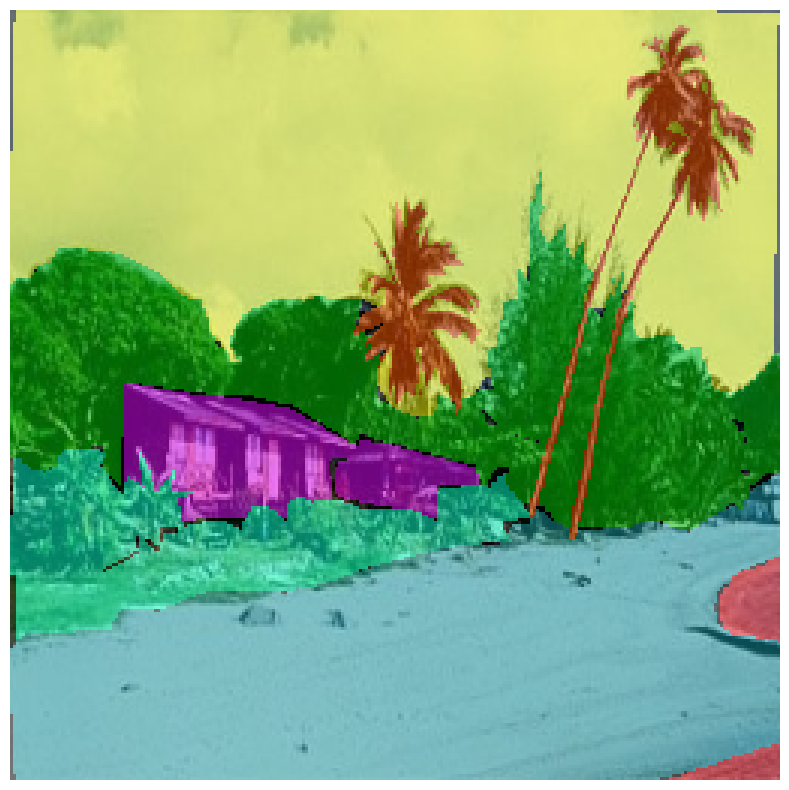

In [ ]:
image = np.array(dataset[index]["pixel_values"])
mask = np.array(dataset[index]["label"])

visualize_seg_mask(image, mask)

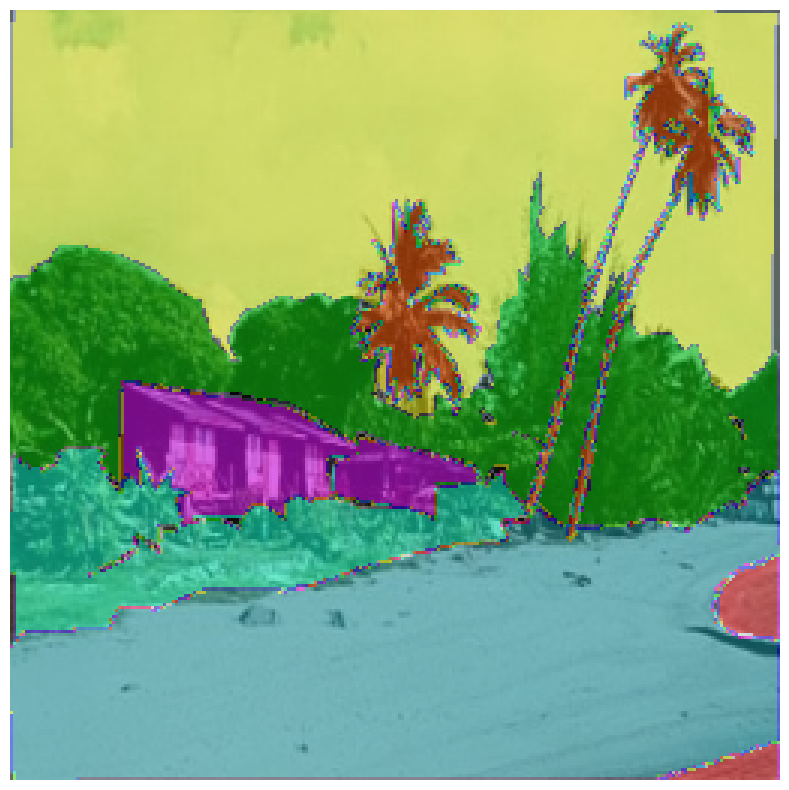

In [ ]:
from torchvision.transforms import Resize, ColorJitter, Compose

transformation_chain = Compose([
    Resize((256, 256)),
    ColorJitter(brightness=0.25, contrast=0.25, saturation=0.25, hue=0.1)
])
resize = Resize((256, 256))

def train_transforms(example_batch):
    example_batch["pixel_values"] = [transformation_chain(x) for x in example_batch["image"]]
    example_batch["label"] = [resize(x) for x in example_batch["annotation"]]
    return example_batch

dataset.set_transform(train_transforms)

image = np.array(dataset[index]["pixel_values"])
mask = np.array(dataset[index]["label"])

visualize_seg_mask(image, mask)